# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.dummy import DummyRegressor

# Load Data

In [2]:
# load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_star = pd.read_csv('train_star.csv')
test_star = pd.read_csv('test_star.csv')
train_non_star = pd.read_csv('train_non_star.csv')
test_non_star = pd.read_csv('test_non_star.csv')


In [3]:
train.head()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,year_played,...,JERSEY_46,JERSEY_51,JERSEY_54,JERSEY_55,JERSEY_67,JERSEY_77,JERSEY_81,JERSEY_88,JERSEY_95,JERSEY_99
0,0.55,0.258993,0.058824,0.374214,0.133929,0.528169,0.696078,0.084580,0.047619,0.058824,...,0,0,0,0,0,0,0,0,0,0
1,0.95,0.848921,0.294118,0.138365,0.017857,0.274648,0.850490,0.076781,0.571429,0.294118,...,0,1,0,0,0,0,0,0,0,0
2,0.55,0.345324,0.588235,0.707547,0.491071,0.422535,0.835784,0.953707,0.523810,0.588235,...,0,0,0,0,0,0,0,0,0,0
3,0.75,0.776978,0.235294,0.940252,0.294643,0.809859,1.000000,0.710704,0.333333,0.352941,...,0,0,0,0,0,0,0,0,0,0
4,0.35,0.057554,0.176471,0.490566,0.455357,0.492958,0.789216,0.358982,0.190476,0.235294,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(282, 189)

In [5]:
test.head()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,year_played,...,JERSEY_46,JERSEY_51,JERSEY_54,JERSEY_55,JERSEY_67,JERSEY_77,JERSEY_81,JERSEY_88,JERSEY_95,JERSEY_99
0,0.55,0.395683,0.352941,0.273585,0.071429,0.387324,0.715686,0.164371,0.523810,0.352941,...,0,0,0,0,0,0,0,0,0,0
1,0.35,0.129496,0.058824,0.081761,0.035714,0.056338,0.625000,0.039371,0.285714,0.058824,...,0,0,0,0,0,0,0,0,0,0
2,0.40,0.237410,0.117647,0.433962,0.276786,0.161972,0.723039,0.039501,0.190476,0.117647,...,0,0,0,0,0,0,0,0,0,0
3,0.40,0.273381,0.176471,0.210692,0.125000,0.232394,0.715686,0.039233,0.380952,0.176471,...,0,0,0,0,0,0,0,0,0,0
4,0.45,0.129496,0.058824,0.047170,0.000000,0.035211,0.901961,0.035448,0.095238,0.058824,...,0,0,0,0,0,0,0,0,0,0


# Split data

In [6]:
X_train = train.drop(columns='current_avg_salary')
X_train_star = train_star.drop(columns='current_avg_salary')
X_train_non_star = train_non_star.drop(columns='current_avg_salary')

In [7]:
y_train = train.current_avg_salary
y_train_star = train_star.current_avg_salary
y_train_non_star = train_non_star.current_avg_salary

In [8]:
X_test = test.drop(columns='current_avg_salary')
y_test = test.current_avg_salary
X_test_star = test_star.drop(columns='current_avg_salary')
y_test_star = test_star.current_avg_salary
X_test_non_star = test_non_star.drop(columns='current_avg_salary')
y_test_non_star = test_non_star.current_avg_salary

In [9]:
y_train.max()

1.0

# First Model - Linear Regression

In [10]:
# fit the model
lm = LinearRegression().fit(X_train, y_train)

In [11]:
# use model to predict botn train and test data
y_tr_pred = lm.predict(X_train)
y_te_pred = lm.predict(X_test)

In [12]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
r2

(0.8723915793909444, -8.531261547455891e+20)

In [13]:
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
mae

(0.06764734204828449, 1818474257.4524186)

In [14]:
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
mse

(0.007755372832485657, 4.703907369628075e+19)

The eveluation metric show the model doing good to predict train data, but very poor on the test data. It is clearly overfitting, need to reduce features.

## Refining The Model

In [15]:
# make a pipeline including 'SelectKbest' as a step
pipe = make_pipeline( 
    SelectKBest(f_regression),
    LinearRegression()
)

In [16]:
# define k
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [17]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [18]:
lr_grid_cv.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x0000020292F198B0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [19]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [20]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 6}

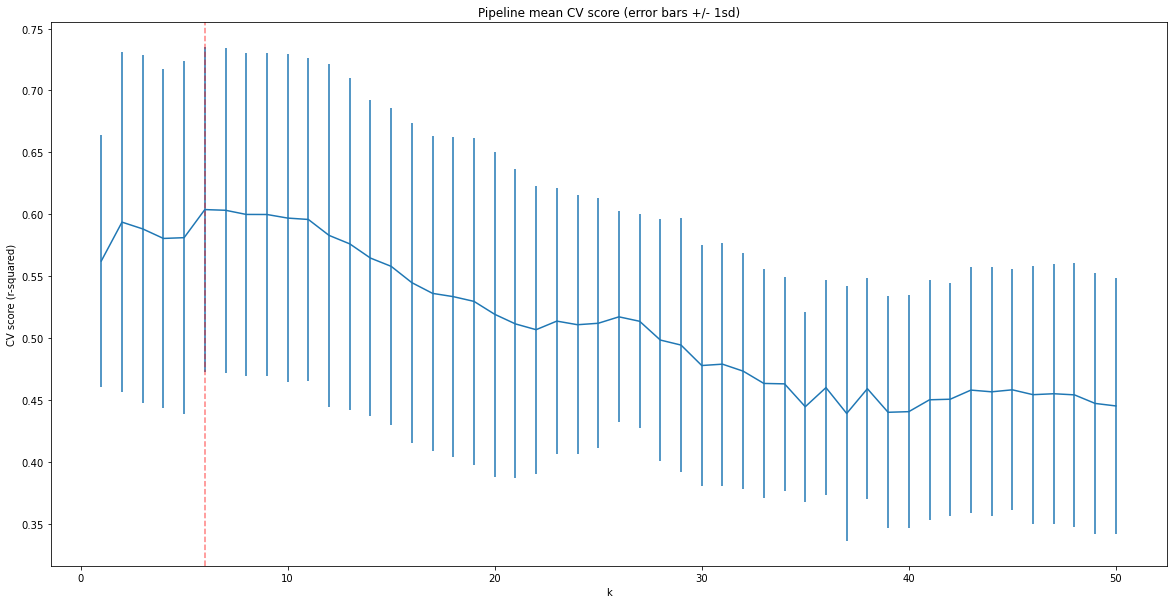

In [21]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(20, 10))
plt.errorbar(cv_k[:50], score_mean[:50], yerr=score_std[:50])
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');
plt.rcParams.update({'font.size': 18})

The above suggets a good value for k is 6, but there was decline with k, follow by a rapid increase with k. After the best k, there is a very slow decline.It is interesting that the variance of the results dose not change much as k incresed.

Which features were most useful? Step into best model. Starting with the fitted grid search object,get the best estimator, then the named step 'selectkbest', for which use its get_support() method for a logical mask of the features selected.

In [22]:
# Select the most useful features
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

Similarly, instead of using the 'selectkbest' named step, we can access the named step for the linear regression model and, from that, grab the model coefficients via its coef_ attribute:

In [23]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

PTS              0.579280
AST              0.364178
year_played      0.204195
REB              0.058857
DRAFT_ROUND_1    0.024058
PIE             -0.108458
dtype: float64

The results suggest that total number of points is biggest positive feature. Thus makes intuitive sense. Player who has higher total number of points get pays more.

## use non_star data set

In [24]:
non_star_lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)
non_star_lr_grid_cv.fit(X_train_non_star, y_train_non_star)

C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x0000020292F198B0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [25]:
NS_score_mean = non_star_lr_grid_cv.cv_results_['mean_test_score']
NS_score_std = non_star_lr_grid_cv.cv_results_['std_test_score']
NS_cv_k = [k for k in non_star_lr_grid_cv.cv_results_['param_selectkbest__k']]

In [26]:
#Print the `best_params_` attribute of `lr_grid_cv`
non_star_lr_grid_cv.best_params_

{'selectkbest__k': 17}

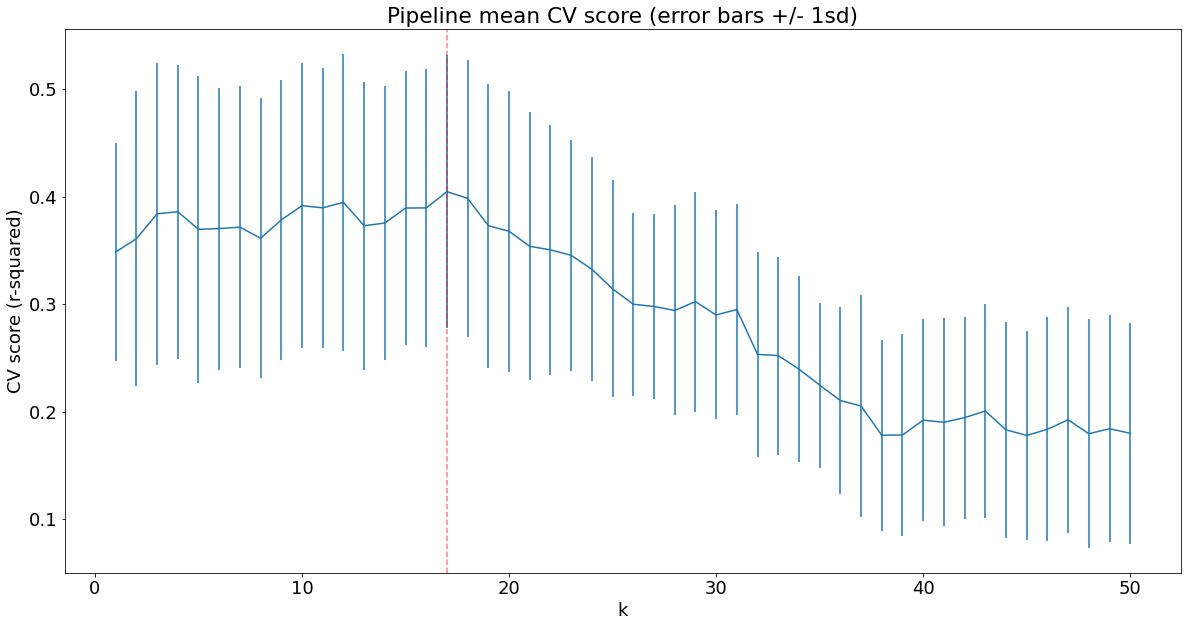

In [27]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
NS_best_k = non_star_lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(20, 10))
plt.errorbar(NS_cv_k[:50], NS_score_mean[:50], yerr=score_std[:50])
plt.axvline(x=NS_best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');
plt.rcParams.update({'font.size': 18})

In [28]:
# Select the most useful features
NS_selected = non_star_lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
NS_coefs = non_star_lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
NS_features = X_train_non_star.columns[NS_selected]
pd.Series(NS_coefs, index=NS_features).sort_values(ascending=False)

PTS                      0.334995
JERSEY_42                0.212375
AST                      0.151568
DRAFT#_16                0.114972
SEASON_EXP               0.108883
REB                      0.093235
DRAFT_YEAR_2014          0.077032
DRAFT_YEAR_2016          0.073790
DRAFT#_5                 0.047397
DRAFT_ROUND_1            0.026112
DRAFT_YEAR_Undrafted     0.015786
DRAFT#_Undrafted        -0.009700
DRAFT_ROUND_Undrafted   -0.009700
DRAFT#_3                -0.010065
DRAFT_YEAR_2019         -0.020254
year_played             -0.030230
PIE                     -0.086984
dtype: float64

# Second Model - Random Forest Regression

In [29]:
# fit the model
regr = RandomForestRegressor(random_state=47)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=47)

In [30]:
# use model to predict botn train and test data
y_tr_pred = regr.predict(X_train)
y_te_pred = regr.predict(X_test)

In [31]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
r2

(0.9595453311446888, 0.7196016129577019)

In [32]:
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
mae

(0.035088612519969795, 0.07687053123294073)

In [33]:
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
mse

(0.002458623328227449, 0.01546041030278132)

## Hyperparameter search using GridSearchCV

In [34]:
# Print the accuracy from the testing data.
rf_default_cv_results = cross_validate(regr, X_train, y_train, cv=5)

In [35]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.75678941, 0.7094262 , 0.6501893 , 0.56024473, 0.72256069])

In [36]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.6798420639538107, 0.06899826762862693)

In [37]:
# GridSearchCV
# define parametes
n_est = list(range(108, 113, 1))
grid_params = {'n_estimators': n_est,
               'max_depth': [4,5,6, None]}
grid_params

{'n_estimators': [108, 109, 110, 111, 112], 'max_depth': [4, 5, 6, None]}

In [38]:
# define GridSearchCV
rf_grid_cv = GridSearchCV(regr, grid_params,cv=5, n_jobs=-1)

In [39]:
# fit the data
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=47), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, None],
                         'n_estimators': [108, 109, 110, 111, 112]})

In [40]:
# find the best_params_
rf_grid_cv.best_params_

{'max_depth': 5, 'n_estimators': 112}

In [41]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.75461512, 0.70504104, 0.65253199, 0.5767102 , 0.72966737])

In [42]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.6837131434293185, 0.0632703015636976)

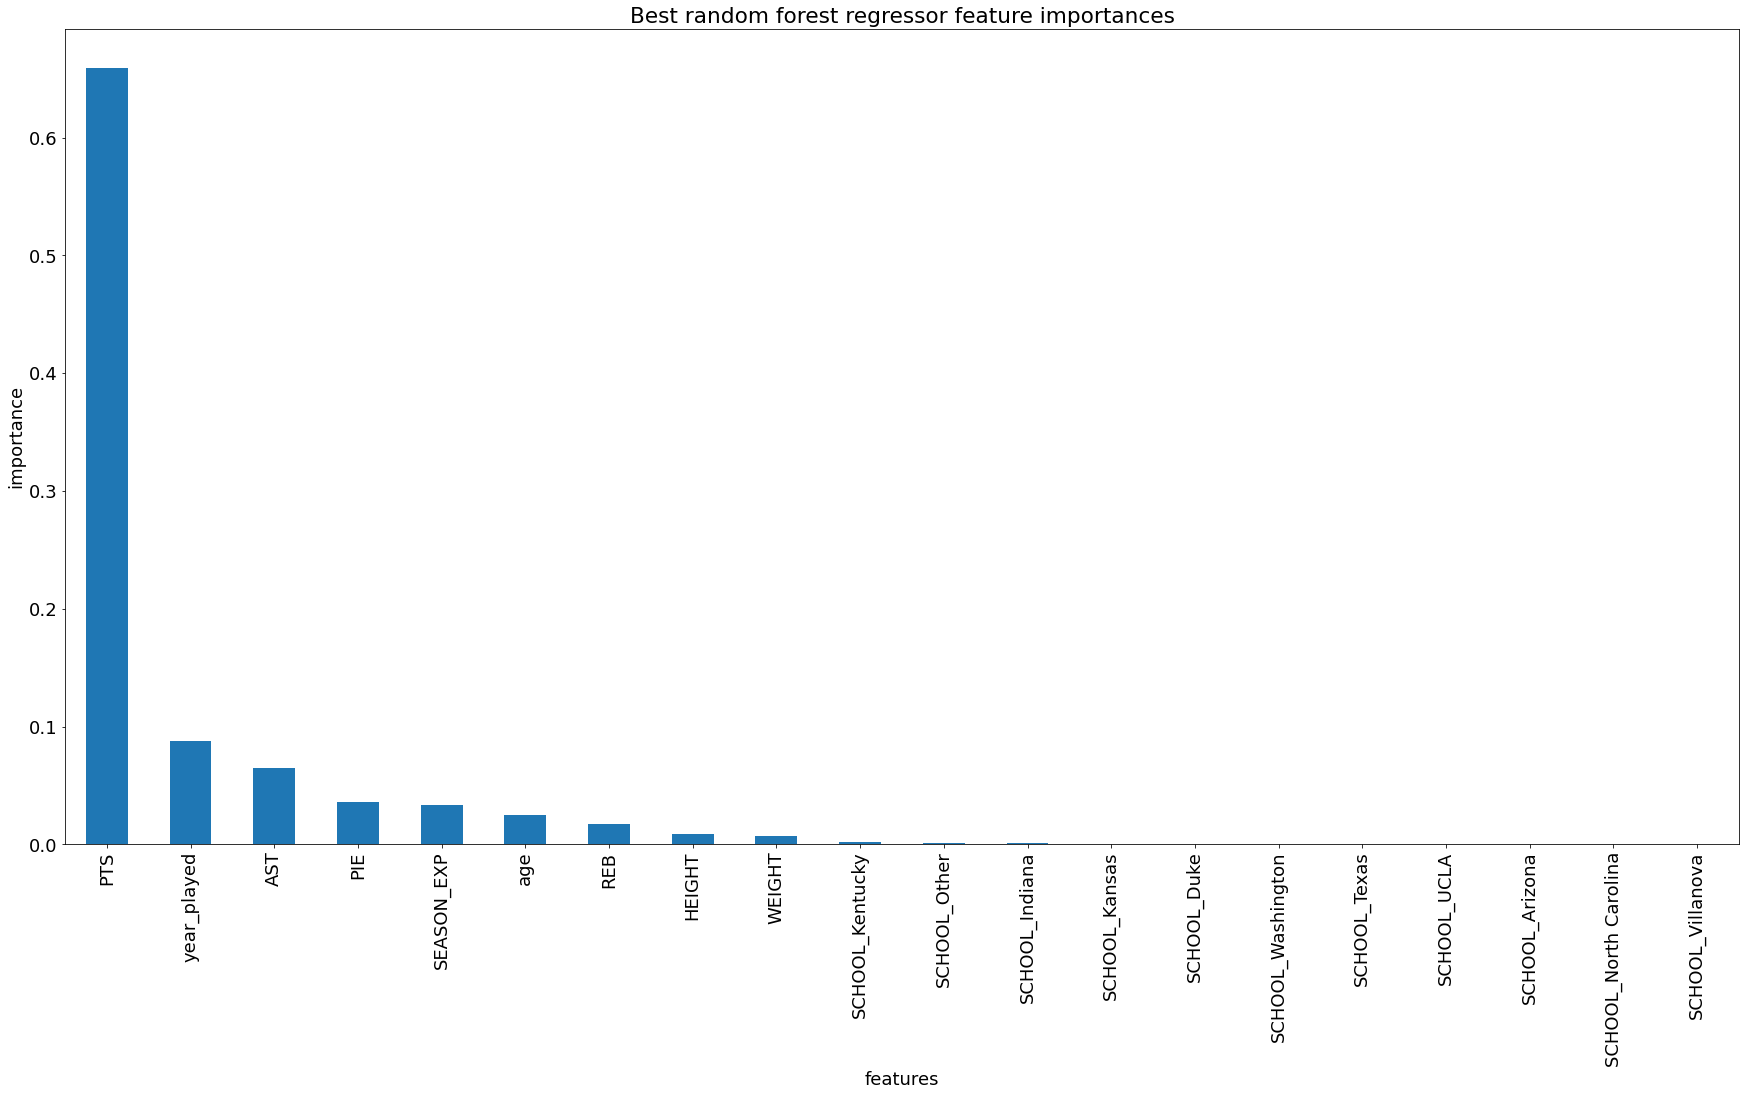

In [43]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(30, 15))
imps = rf_grid_cv.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps[:20], index=X_train.columns[:20]).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances')
plt.rcParams.update({'font.size': 50})

Total number of points is the most importance feature same as what linear model suggest. However, the second most importance feature is year played instead of Assist to turnover ratio.

## Use Non star data

In [44]:
NS_regr = RandomForestRegressor(random_state=47)
NS_regr.fit(X_train_non_star, y_train_non_star)

RandomForestRegressor(random_state=47)

In [45]:
NS_rf_default_cv_results = cross_validate(NS_regr, X_train_non_star, y_train_non_star, cv=5)
NS_rf_cv_scores = NS_rf_default_cv_results['test_score']
NS_rf_cv_scores

array([ 0.40802669, -0.05582086,  0.4432993 ,  0.50720997,  0.68736576])

In [46]:
np.mean(NS_rf_cv_scores), np.std(NS_rf_cv_scores)

(0.39801617213482354, 0.24648135671476984)

In [47]:
# GridSearchCV
# define parametes
n_est = list(range(108, 113, 1))
grid_params = {'n_estimators': n_est,
               'max_depth': [4,5,6, None]}
grid_params

{'n_estimators': [108, 109, 110, 111, 112], 'max_depth': [4, 5, 6, None]}

In [48]:
# define GridSearchCV
NS_rf_grid_cv = GridSearchCV(NS_regr, grid_params,cv=5, n_jobs=-1)

In [49]:
# fit the data
NS_rf_grid_cv.fit(X_train_non_star, y_train_non_star)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=47), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, None],
                         'n_estimators': [108, 109, 110, 111, 112]})

In [50]:
# find the best_params_
rf_grid_cv.best_params_

{'max_depth': 5, 'n_estimators': 112}

In [51]:
NS_rf_best_cv_results = cross_validate(NS_rf_grid_cv.best_estimator_, X_train_non_star, y_train_non_star, cv=5)
NS_rf_best_scores = NS_rf_best_cv_results['test_score']
NS_rf_best_scores

array([0.42147913, 0.02231554, 0.42119629, 0.52756613, 0.67226145])

In [52]:
np.mean(NS_rf_best_scores), np.std(NS_rf_best_scores)

(0.41296370662353843, 0.21592374129267086)

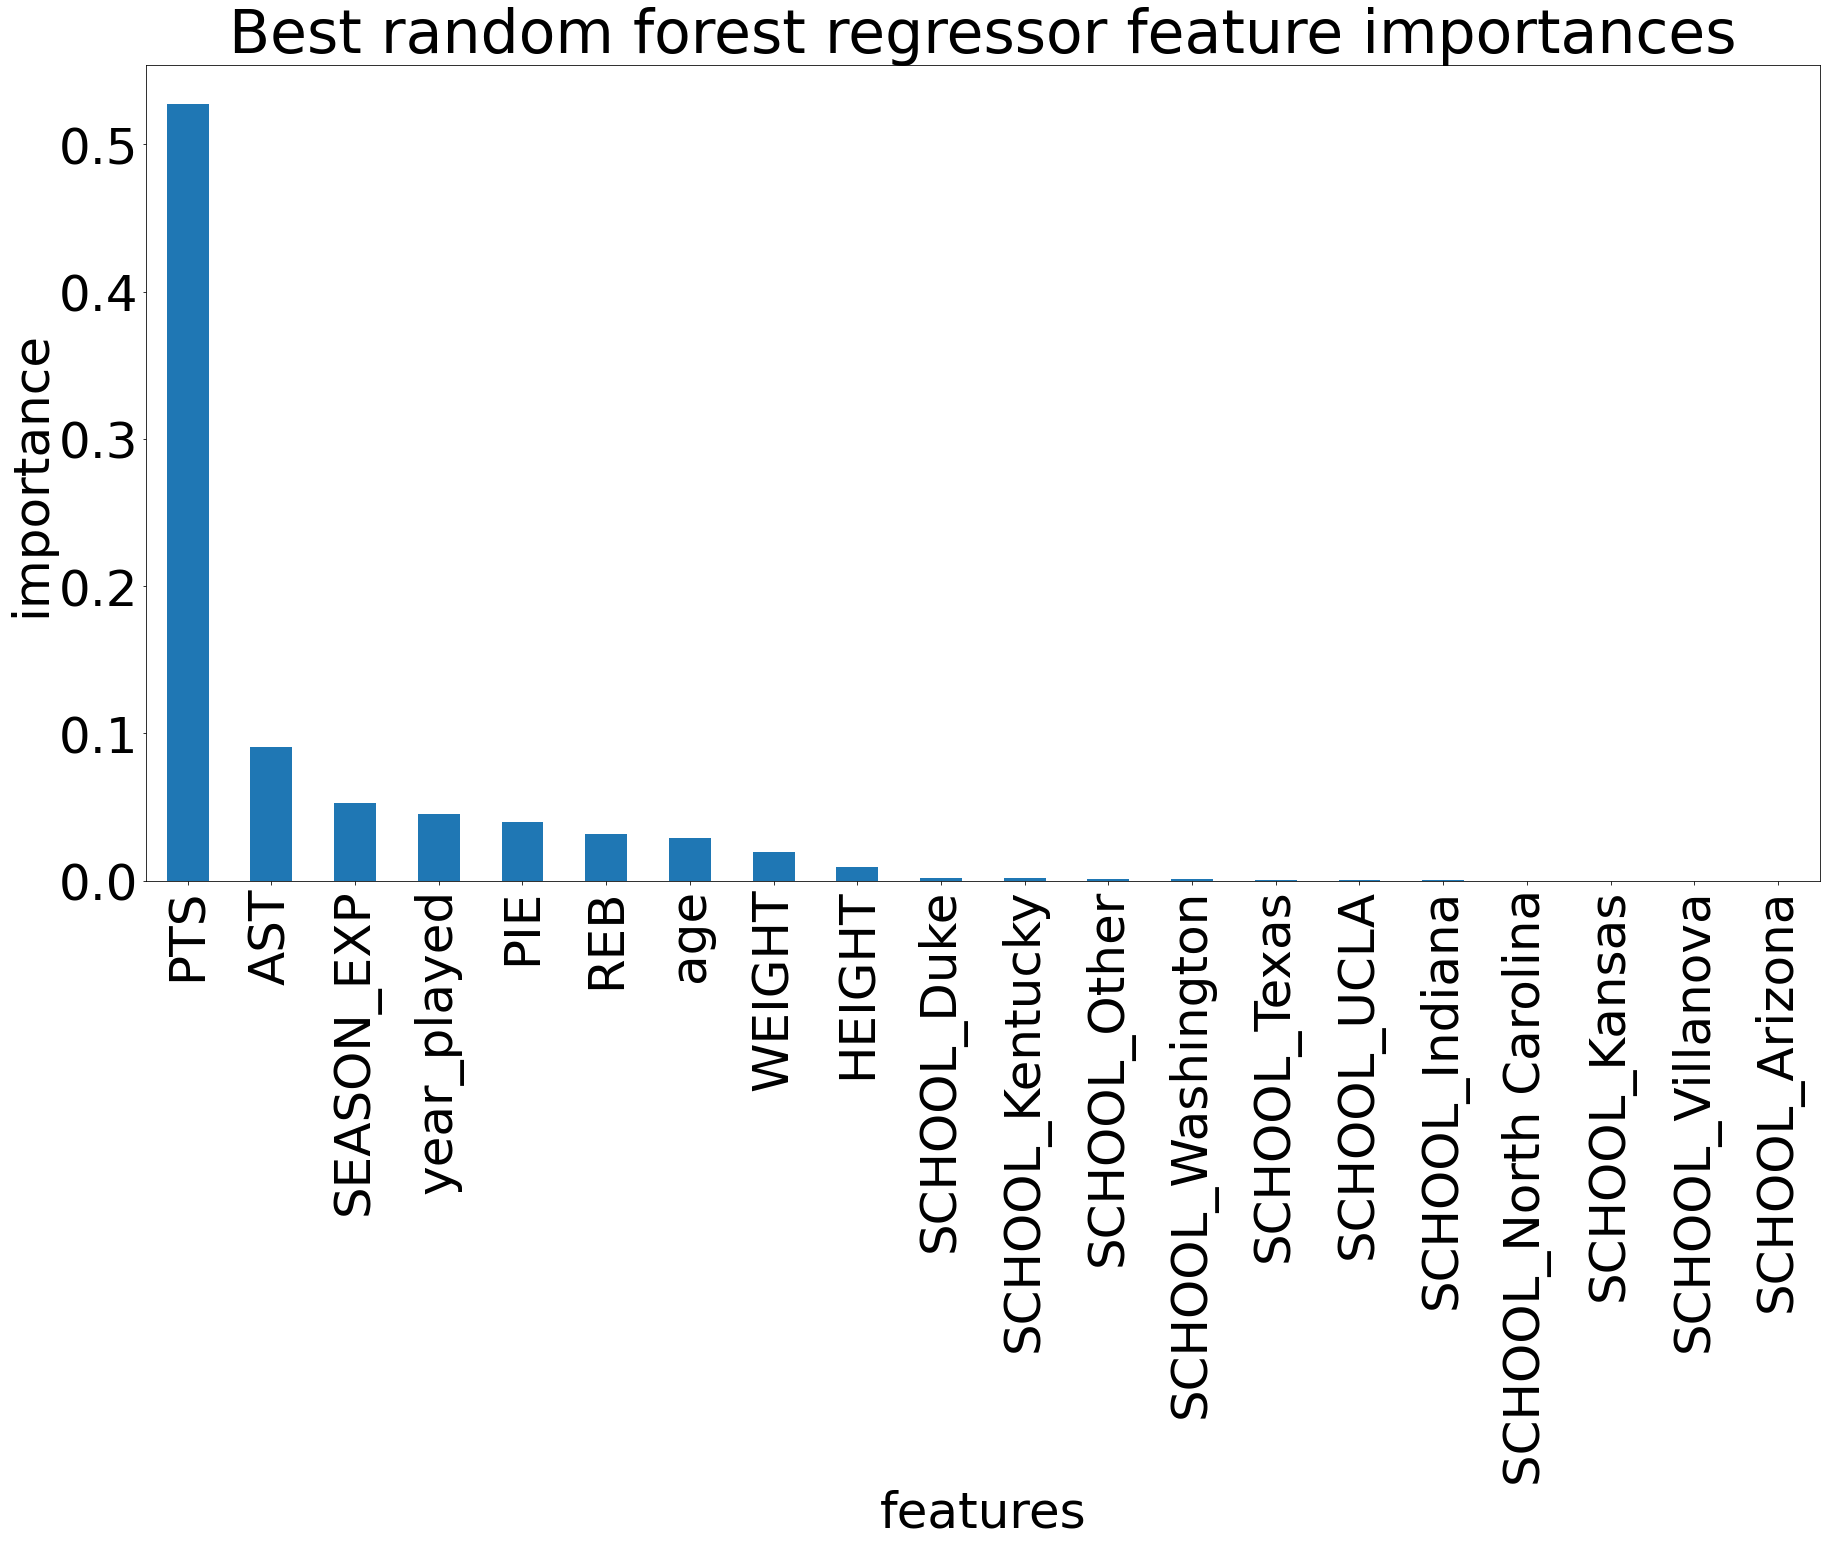

In [53]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(30, 15))
NS_imps = NS_rf_grid_cv.best_estimator_.feature_importances_
NS_rf_feat_imps = pd.Series(NS_imps[:20], index=X_train_non_star.columns[:20]).sort_values(ascending=False)
NS_rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances')
plt.rcParams.update({'font.size': 50})

# Third Model - Knn regression

In [54]:
KNNrg = KNeighborsRegressor()
KNNrg.fit(X_train, y_train)

KNeighborsRegressor()

In [55]:
# use model to predict botn train and test data
y_tr_pred = KNNrg.predict(X_train)
y_te_pred = KNNrg.predict(X_test)

In [56]:
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
print('r2: ', r2)
# MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
print('mae: ', mae)
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
print ('mes: ', mse)

r2:  (0.4848443149803453, 0.19778898963180158)
mae:  (0.12209185219811397, 0.13365993127757606)
mes:  (0.03130846996642831, 0.04423175004865554)


## Hyperparameter search using GridSearchCV

In [57]:
# GridSearchCV
# define parametes
n_nei = list(range(11, 20, 1))
grid_params = {'n_neighbors': n_nei,
               'weights': ['uniform', 'distance']}
grid_params

{'n_neighbors': [11, 12, 13, 14, 15, 16, 17, 18, 19],
 'weights': ['uniform', 'distance']}

In [58]:
# define GridSearchCV
KNN_grid_cv = GridSearchCV(KNNrg, grid_params,cv=5, n_jobs=-1)
# fit the data
KNN_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [11, 12, 13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [59]:
# find the best_params_
KNN_grid_cv.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [60]:
KNN_best_cv_results = cross_validate(KNN_grid_cv.best_estimator_, X_train, y_train, cv=5)
KNN_best_scores = KNN_best_cv_results['test_score']
KNN_best_scores

array([0.43141688, 0.39609579, 0.61648863, 0.30394988, 0.32006749])

In [61]:
np.mean(KNN_best_scores), np.std(KNN_best_scores)

(0.41360373186612404, 0.11185625962370108)

# Final Model Selection

## Linear regression model performance

In [62]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [63]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(0.1142777933058519, 0.016871931027227116)

In [64]:
lr_mae = mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))
lr_mae

0.09779078346608017

In [65]:
# load unscale the data
df_unscale = pd.read_csv('clean_data.csv')

In [66]:
# find the scale-ratio
scale_ratio = df_unscale['current_avg_salary'].max() / 1
scale_ratio

44393664.0

In [67]:
# unscale the mae
unscale_lr_mae = lr_mae * scale_ratio
unscale_lr_mae

4341291.183489919

The ucscale mean abosute error for salary is 4,341,291. The means on average we might expecect to be off by around $4,300,000 if we guessed player's salary based on an average of their known attributes.

In [68]:
# let see the median salary
median = df_unscale['current_avg_salary'].median()

In [69]:
df_unscale['current_avg_salary'].mean()

10092232.249386212

### on Star regression model performance

In [70]:
NS_lr_neg_mae = cross_validate(non_star_lr_grid_cv.best_estimator_, X_train_non_star, y_train_non_star, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
NS_lr_mae_mean = np.mean(-1 * NS_lr_neg_mae['test_score'])
NS_lr_mae_std = np.std(-1 * NS_lr_neg_mae['test_score'])
NS_lr_mae_mean, NS_lr_mae_std

(0.07988322363859521, 0.006582279750713008)

In [71]:
NS_lr_mae = mean_absolute_error(y_test_non_star, non_star_lr_grid_cv.best_estimator_.predict(X_test_non_star))
NS_lr_mae

0.08980459311291888

In [72]:
unscale_NS_lr_mae = NS_lr_mae * scale_ratio
unscale_NS_lr_mae

3986754.932311635

## Random forest regression model performance

In [73]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [74]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.09844355829736075, 0.00860908293278633)

In [75]:
rf_mae= mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))
rf_mae

0.07964085815274138

In [76]:
unscale_rf_mae = rf_mae*scale_ratio
unscale_rf_mae

3535549.4975044616

In [77]:
unscale_rf_mae / median * 100

62.51913020148431

### Non Star Model performance

In [78]:
NS_rf_neg_mae = cross_validate(NS_rf_grid_cv.best_estimator_, X_train_non_star, y_train_non_star, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [79]:
NS_rf_mae_mean = np.mean(-1 * NS_rf_neg_mae['test_score'])
NS_rf_mae_std = np.std(-1 * NS_rf_neg_mae['test_score'])
NS_rf_mae_mean, NS_rf_mae_std

(0.07437220987824726, 0.0067180913922253995)

In [80]:
NS_rf_mae= mean_absolute_error(y_test_non_star, rf_grid_cv.best_estimator_.predict(X_test_non_star))
NS_rf_mae

0.07301741286828367

In [81]:
unscale_NS_rf_mae = NS_rf_mae*scale_ratio
unscale_NS_rf_mae

3241510.4930238617

## KNN regression model performance

In [82]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
KNN_neg_mae = cross_validate(KNN_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [83]:
KNN_mae_mean = np.mean(-1 * KNN_neg_mae['test_score'])
KNN_mae_std = np.std(-1 * KNN_neg_mae['test_score'])
KNN_mae_mean, KNN_mae_std

(0.1344380509487724, 0.020777445466463935)

In [84]:
KNN_mae = mean_absolute_error(y_test, KNN_grid_cv.best_estimator_.predict(X_test))
KNN_mae

0.11910165689396882

In [85]:
# unscale the mae
unscale_KNN_mae = KNN_mae*scale_ratio
unscale_KNN_mae

5287358.937994136

## Dummy model

In [86]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)

DummyRegressor()

In [87]:
dumb_mae = mean_absolute_error(y_test, dumb_reg.predict(X_test))
dumb_mae

0.18619472731154876

In [88]:
unscale_dumb_mae = dumb_mae * scale_ratio
unscale_dumb_mae

8265866.162840519

Mean absolute error of random guess model is 8.2 million

In [89]:
(unscale_dumb_mae-unscale_lr_mae)/unscale_dumb_mae*100

47.47929499504432

# Conclusion

The random forest model is the best model of the three. It has a lowest cross-validation mean absolute which is around $3,5 million. It is not the best, but it dose guide the direciton. It's perfomance is 47% better than a random guess.